<a href="https://colab.research.google.com/github/roysoni24/Airbnb-analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions
 of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Earlier we didn't know about the "Github " And nor about the repositories , So firstly, we means all the group members created a account in github and then created a repositories  so that we can check how to commit and upload the progress of the analysis project like versoining module from time to time in our repositories. After The first commit we all have started analysing the raw data provided to us . The data is in the  form of .csv files, so first we go through the data like all the coloumns header and which type of values are inside that columns. so that's how we started our analysis journey...

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load .csv file
df_airb = pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project1 AirBnb Analysis/Copy of Airbnb NYC 2019.csv')

In [ ]:
df_airb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Shape of dataframe
df_airb.shape

In [ ]:
#Checking datatypes and other information of columns
df_airb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Extracting all columns in the dataframe
df_airb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#Indentifying Columns that have null values
df_airb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#replacing Null values in the "reviews_per_month" column with 0 
df_airb['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
#dropping columns that's not significant
df_airb.drop(["last_review","latitude","longitude"],inplace=True,axis=1)

In [ ]:
df_airb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#replacing Null values in the "name" column with "Anonymous"
df_airb['name'].fillna("Anonymous",inplace=True)

In [ ]:
#replacing Null values in the "host_name" column with "Anonymous Host Name" 
df_airb['host_name'].fillna("Anonymous Host Name",inplace=True)

In [ ]:
#Examining Changes 
df_airb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##1. What can we learn about different hosts and areas?

firstly, we extract the value_listing_counts of different hosts grouped by their neighbourhood

In [ ]:
#grouped host_name and neighbourhoos_group on their host_listing_counts and then  sort the values in descending order
hosts_in_areas = df_airb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_in_areas.sort_values(by='calculated_host_listings_count', ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7483,Kazuya,Manhattan,103
...,...,...,...
5821,Iman,Brooklyn,1
5822,Imani,Brooklyn,1
5824,Imelda,Queens,1
5825,Imma,Brooklyn,1


In [ ]:
#hosts_in_areas.value_counts
top_10_hosts=hosts_in_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(10)

In [ ]:
top_10_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7483,Kazuya,Manhattan,103
7482,Kazuya,Brooklyn,103
7484,Kazuya,Queens,103
13220,Sonder,Manhattan,96
6544,Jeremy & Laura,Manhattan,96
2905,Corporate Housing,Manhattan,91


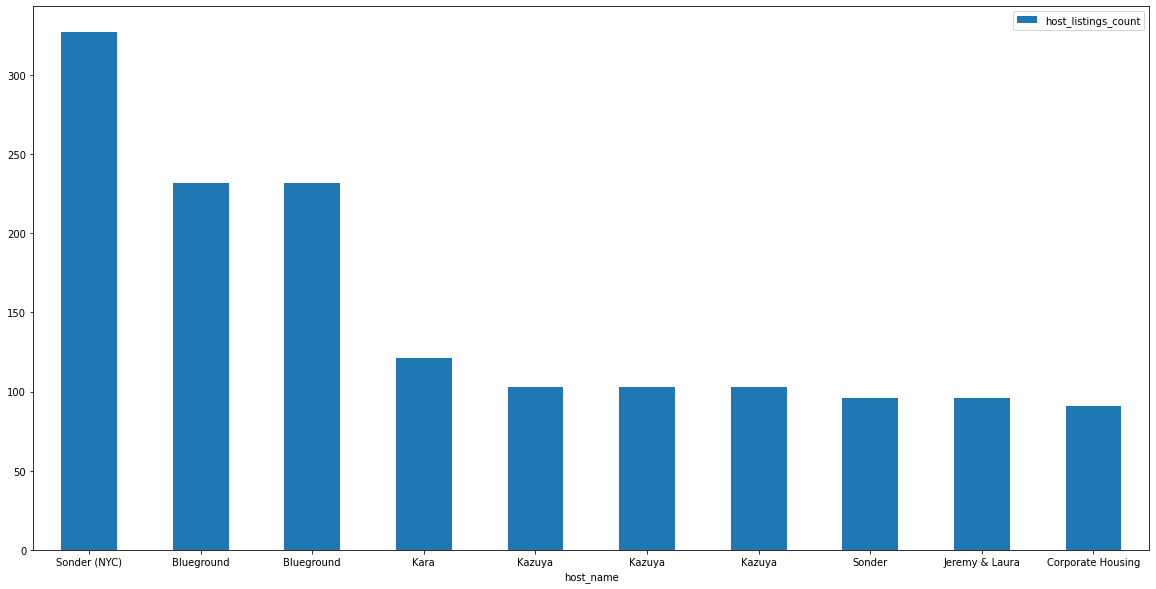

In [ ]:
#top_10 hosts and their value listing counts plotted on bar chart
top_10_hosts_for_bar_plot = pd.DataFrame({'host_name':top_10_hosts["host_name"], 'host_listings_count':top_10_hosts["calculated_host_listings_count"]})
ax = top_10_hosts_for_bar_plot.plot.bar(x='host_name', y='host_listings_count', rot=0,figsize=(20,10))

2. What can we learn from predictions? (ex: locations, prices, reviews, etc)


In [20]:
loaction_review_data = df_airb.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
loaction_review_data

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


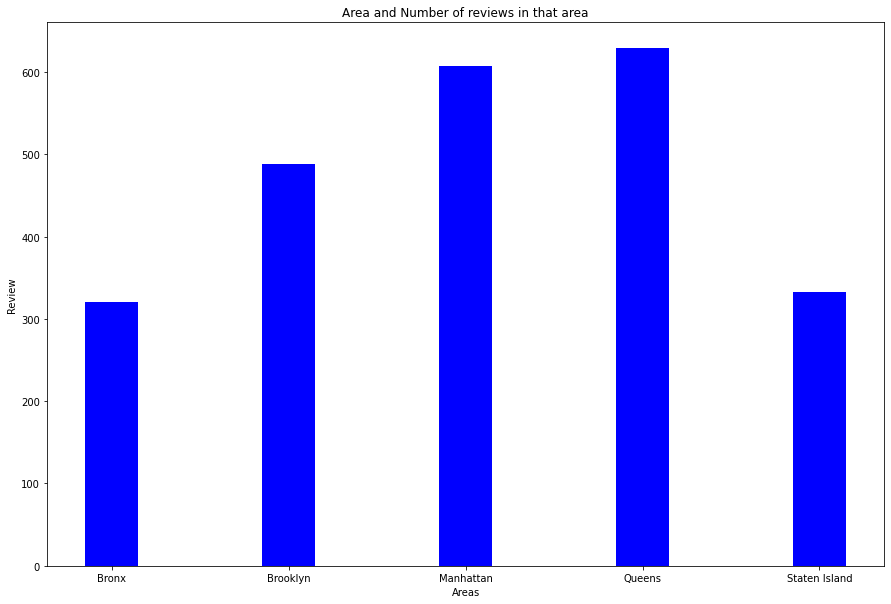

In [21]:
Areas = loaction_review_data['neighbourhood_group']
Reviews = loaction_review_data['number_of_reviews']

chart = plt.figure(figsize = (15,10))
 
# drawing the bar plot
plt.bar(Areas, Reviews, color ='blue',
        width = 0.3)
 
plt.xlabel("Areas")
plt.ylabel("Review")
plt.title("Area and Number of reviews in that area")
plt.show()

In [22]:
loaction_price_data = df_airb.groupby(['neighbourhood_group'])['price'].max().reset_index()
loaction_price_data

,neighbourhood_group,price
0,Bronx,2500
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000


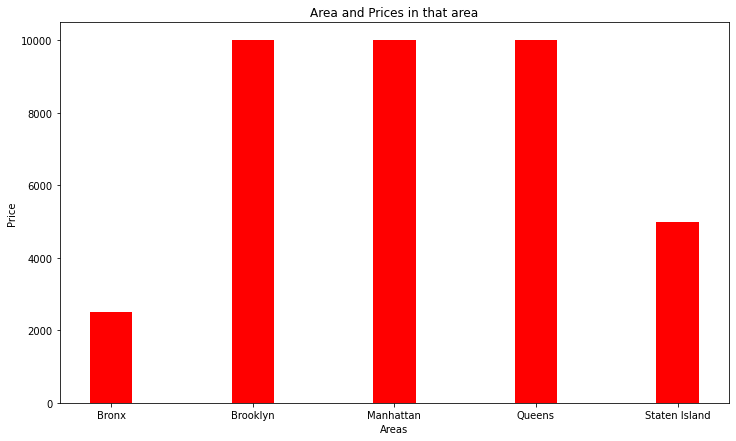

In [23]:
Areas = loaction_price_data['neighbourhood_group']
Price = loaction_price_data['price']

chart = plt.figure(figsize = (12,7))
 
# drawing the bar plot
plt.bar(Areas, Price, color ='red',
        width = 0.3)
 
plt.xlabel("Areas")
plt.ylabel("Price")
plt.title("Area and Prices in that area")
plt.show()

In [24]:
review_price_data = df_airb.groupby(['price'])['number_of_reviews'].max().reset_index()
review_price_data.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


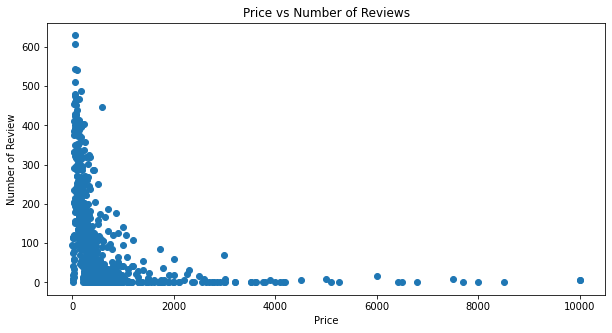

In [25]:
price = review_price_data['price']
review = review_price_data['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(price, review)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()